LenNet-5 using Keras and Mnist dataset

import important libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import math

from tensorflow import keras
from keras.utils import normalize,to_categorical
from tensorflow.keras.layers import Flatten,Dense,Conv2D,AveragePooling2D
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

import dataset

In [2]:
mnist=tf.keras.datasets.mnist

split dataset

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


prepare dataset

In [4]:
rows,cols=28,28

In [5]:
x_train=x_train.reshape(x_train.shape[0],rows,cols,1)
x_test=x_test.reshape(x_test.shape[0],rows,cols,1)

In [6]:
input_shape=(rows,cols,1)

normalization

In [7]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

build our model

In [17]:
model=tf.keras.Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add (Flatten())
model.add(Dense(units=120,activation='tanh'))
model.add (Flatten())
model.add(Dense(units=84,activation='tanh'))
model.add(Dense(units=10,activation='softmax'))





compile moodel

In [20]:
model.compile(loss = 'categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.0,weight_decay=0.0), metrics=['acc'])

fit model

In [21]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
469/469 [==============================] - 22s 43ms/step - loss: 0.4057 - acc: 0.8834
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1666 - acc: 0.9505
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1131 - acc: 0.9661
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0874 - acc: 0.9738
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0724 - acc: 0.9785
Epoch 6/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0624 - acc: 0.9815
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0551 - acc: 0.9834
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0493 - acc: 0.9850
Epoch 9/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0444 - acc: 0.9864
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0404 - acc: 0.9878


accuracy

In [22]:
loss,acc=model.evaluate(x_test,y_test)
print('Total Accuracy',acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0479 - acc: 0.9844
Total Accuracy 0.9843999743461609


In [23]:
x_train=x_train.reshape(x_train.shape[0],28,28)
x_test=x_test.reshape(x_test.shape[0],28,28)

the real value is 


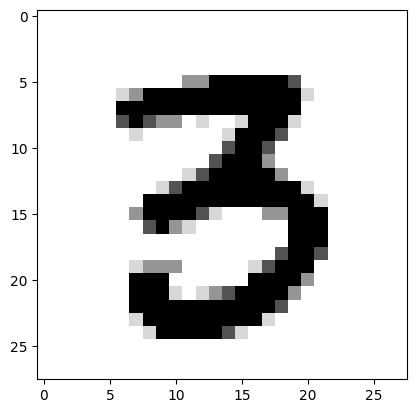

In [31]:
image_index=5555
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
print('the real value is ')
plt.show()



In [32]:
pred=model.predict(x_test[image_index].reshape(1,rows,cols,1))
print('the predicted value is ', pred.argmax())

1/1 [==============================] - 0s 24ms/step
the predicted value is  3
